In [1]:
import pickle
from scipy import stats 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import warnings
import sidetable
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

plt.rcParams["figure.figsize"] = (10,8)

pd.options.display.max_columns = None

# DATAFRAME COMPLETO

In [2]:
df = pd.read_csv('../1.data/encuesta_analistas.csv', index_col=0)
df.sample()

,edad,genero,pais,formacion,ocupacion,lenguajes_programacion,lenguajes_recomendados,IDE,plataforma_computacion,visualizacion,sector,tamaño_empresa,equipo,actividades,salario,productos_big_data,herramienta_data_analytics,notebooks,plataformas_nube,uso_plataformas,formacion_data,fuentes_online
10263,25-29,Man,Pakistan,Master’s degree,Data Analyst,"Python, R, SQL, Java",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,RStudio ,Visual Studio Code (VSCode) ,Py...",A laptop,"Matplotlib ,Seaborn ,Plotly / Plotly Express ,Ggplot / ggplot2 ,D3 js ,Bokeh",Computers/Technology,0-49 employees,1-2,"Analyze and understand data to influence product or business decisions, Build and/or r...","1,000-1,999",MySQL,"Local development environments (RStudio, JupyterLab, etc.)","Kaggle Notebooks, Google Cloud Notebooks (AI Platform / Vertex AI) , Colab Notebooks","Amazon Web Services (AWS) , Google Cloud Platform (GCP)","Amazon Elastic Compute Cloud (EC2) , Google Cloud Compute Engine","Udacity, LinkedIn Learning, Cloud-certification programs (direct from AWS, Azure, GCP,...","Email newsletters (Data Elixir, O'Reilly Data & AI, etc), Blogs (Towards Data Science,..."


# VISUALIZACIÓN

In [3]:
df_split_vis = df["visualizacion"].str.split(",").apply(pd.Series)
df_split_vis

,0,1,2,3,4,5,6,7,8,9
16,Matplotlib,Seaborn,Plotly / Plotly Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Matplotlib,Plotly / Plotly Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,Plotly / Plotly Express,Ggplot / ggplot2,Shiny,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
25954,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25959,Matplotlib,Seaborn,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25965,Matplotlib,Seaborn,Plotly / Plotly Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25966,Matplotlib,Seaborn,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_conteo_visualizacion = pd.concat([df_split_vis[0].value_counts(), df_split_vis[1].value_counts(),df_split_vis[2].value_counts(),df_split_vis[3].value_counts(),df_split_vis[4].value_counts(),df_split_vis[5].value_counts(),df_split_vis[6].value_counts(),df_split_vis[7].value_counts(), df_split_vis[8].value_counts(), df_split_vis[9].value_counts()], axis=1)

In [5]:
df_conteo_visualizacion.fillna(0, inplace=True)

In [6]:
df_conteo_visualizacion["total"] = df_conteo_visualizacion[0]+ df_conteo_visualizacion[1]+df_conteo_visualizacion[2]+df_conteo_visualizacion[3]+df_conteo_visualizacion[4]+ df_conteo_visualizacion[5]+df_conteo_visualizacion[6]+df_conteo_visualizacion[7] +df_conteo_visualizacion[8]+df_conteo_visualizacion[9]
df_conteo_visualizacion

,0,1,2,3,4,5,6,7,8,9,total
Matplotlib,1464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1464.0
None,255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0
Ggplot / ggplot2,141,138.0,194.0,168.0,0.0,0.0,0.0,0.0,0.0,0.0,641.0
Seaborn,90,1061.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1151.0
Plotly / Plotly Express,75,101.0,413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,589.0
Other,57,12.0,21.0,7.0,6.0,1.0,1.0,0.0,0.0,0.0,105.0
Bokeh,6,8.0,22.0,25.0,19.0,12.0,6.0,5.0,0.0,0.0,103.0
D3 js,6,18.0,14.0,19.0,13.0,11.0,0.0,0.0,0.0,0.0,81.0
Shiny,5,41.0,52.0,44.0,42.0,0.0,0.0,0.0,0.0,0.0,184.0
Altair,5,5.0,7.0,10.0,2.0,5.0,5.0,0.0,0.0,0.0,39.0


In [7]:
df_conteo_visualizacion.reset_index(inplace=True)

In [8]:
nc2 = {"index": "lenguajes"}
df_conteo_visualizacion.rename(columns = nc2, inplace = True)

In [9]:
df_conteo_visualizacion.sample()

,lenguajes,0,1,2,3,4,5,6,7,8,9,total
3,Seaborn,90,1061.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1151.0


In [10]:
df_conteo_visualizacion["porcentaje"] = round(df_conteo_visualizacion["total"]*100/df_conteo_visualizacion["total"].sum(),2)

In [57]:
df_conteo_visualizacion.sort_values(by="total", ascending = False, ignore_index = True, inplace = True)

In [58]:
df_conteo_visualizacion

,lenguajes,0,1,2,3,4,5,6,7,8,9,total,porcentaje
0,Matplotlib,1464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1464.0,30.28
1,Seaborn,90,1061.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1151.0,23.81
2,Ggplot / ggplot2,141,138.0,194.0,168.0,0.0,0.0,0.0,0.0,0.0,0.0,641.0,13.26
3,Plotly / Plotly Express,75,101.0,413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,589.0,12.18
4,None,255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,5.27
5,Shiny,5,41.0,52.0,44.0,42.0,0.0,0.0,0.0,0.0,0.0,184.0,3.81
6,Geoplotlib,3,17.0,34.0,41.0,29.0,9.0,5.0,2.0,5.0,0.0,145.0,3.00
7,Other,57,12.0,21.0,7.0,6.0,1.0,1.0,0.0,0.0,0.0,105.0,2.17
8,Bokeh,6,8.0,22.0,25.0,19.0,12.0,6.0,5.0,0.0,0.0,103.0,2.13
9,D3 js,6,18.0,14.0,19.0,13.0,11.0,0.0,0.0,0.0,0.0,81.0,1.68


In [59]:
df_conteo_visualizacion.loc(7, "total")

TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given

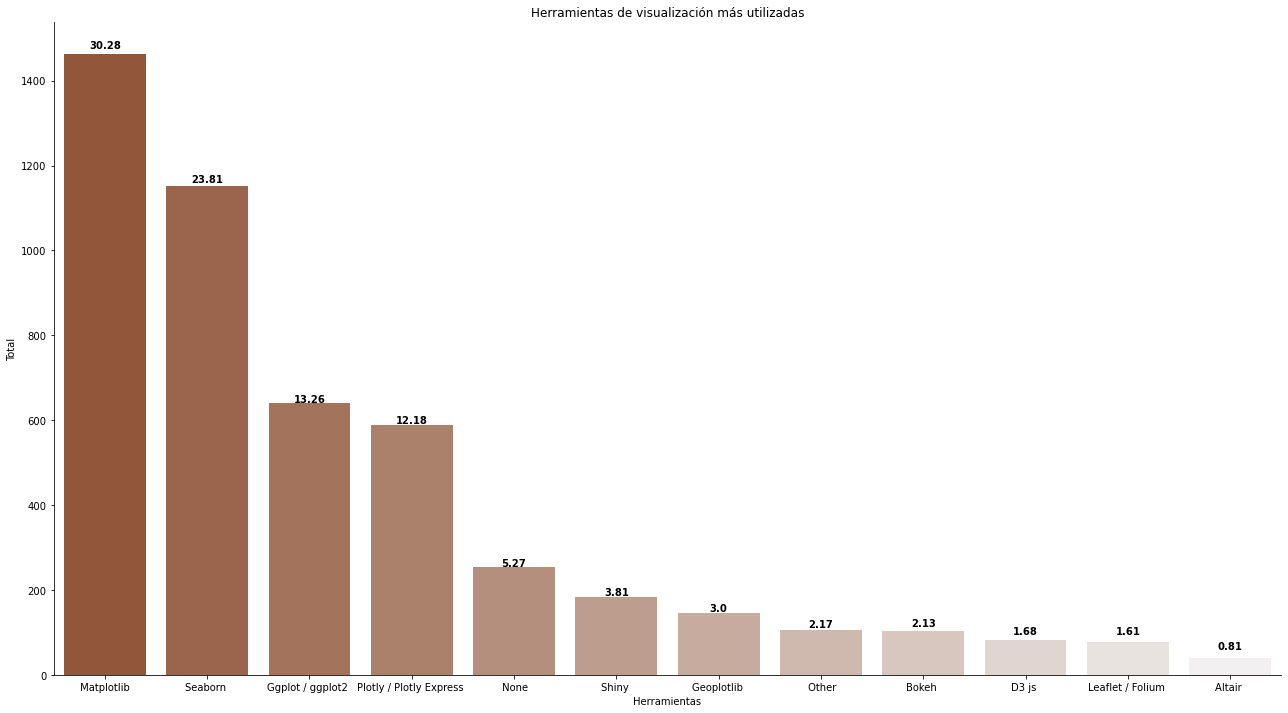

In [65]:


plt.figure(figsize=(22,12))
color = sns.color_palette("light:sienna_r", n_colors = 12)
fig = sns.barplot(x= df_conteo_visualizacion["lenguajes"], y=df_conteo_visualizacion["total"], palette=color )
plt.title("Herramientas de visualización más utilizadas")
fig.set(xlabel="Herramientas", ylabel = "Total")
for indice, valor in enumerate(df_conteo_visualizacion["porcentaje"]):
    plt.text(indice, (valor + df_conteo_visualizacion.loc[indice, "total"]+(3.5*indice)), str(valor),
             {"horizontalalignment":'center', # para colocarlo en el centro de la barra
             "verticalalignment": "top",
             "fontweight" : "bold"})
sns.despine()
plt.show()

# NOTEBOOKS

In [14]:
df_split_not = df["notebooks"].str.split(",").apply(pd.Series)
df_split_not

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
16,Databricks Collaborative Notebooks,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Google Cloud Datalab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Kaggle Notebooks,Azure Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,IBM Watson Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25954,Binder / JupyterHub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25959,Kaggle Notebooks,Google Cloud Notebooks (AI Platform / Vertex AI),Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25965,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25966,Google Cloud Datalab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_conteo_notebooks = pd.concat([df_split_not[0].value_counts(), df_split_not[1].value_counts(),df_split_not[2].value_counts(),df_split_not[3].value_counts(),df_split_not[4].value_counts(),df_split_not[5].value_counts(),df_split_not[6].value_counts(),df_split_not[7].value_counts(), df_split_not[8].value_counts(),df_split_not[9].value_counts(),df_split_not[10].value_counts(),df_split_not[11].value_counts(),df_split_not[12].value_counts(),df_split_not[13].value_counts(),df_split_not[14].value_counts(),df_split_not[15].value_counts()], axis=1)

In [16]:
df_conteo_notebooks.fillna(0, inplace=True)

In [17]:
df_conteo_notebooks["total"] = df_conteo_notebooks[0]+ df_conteo_notebooks[1]+df_conteo_notebooks[2]+df_conteo_notebooks[3]+df_conteo_notebooks[4]+ df_conteo_notebooks[5]+df_conteo_notebooks[6]+df_conteo_notebooks[7] + df_conteo_notebooks[8]+df_conteo_notebooks[9]+df_conteo_notebooks[10]+df_conteo_notebooks[11]+df_conteo_notebooks[12]+df_conteo_notebooks[13]+df_conteo_notebooks[14]+df_conteo_notebooks[15]

In [18]:
df_conteo_notebooks.reset_index(inplace=True)

In [19]:
nc = {"index": "notebooks"}
df_conteo_notebooks.rename(columns = nc, inplace = True)

In [20]:
df_conteo_notebooks.sample()

,notebooks,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,total
29,Zeppelin / Zepl Notebooks,0.0,2.0,2.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [21]:
df_conteo_notebooks["porcentaje"] = round(df_conteo_notebooks["total"]*100/df_conteo_notebooks["total"].sum(),2)

In [22]:
#df_conteo_notebooks.iloc[0] + df_conteo_notebooks.iloc[18]

In [23]:
df_conteo_notebooks.iloc[16] + df_conteo_notebooks.iloc[27]

notebooks      Code Ocean   Code Ocean 
0                                   2.0
1                                   3.0
2                                   2.0
3                                   2.0
4                                   2.0
5                                   0.0
6                                   0.0
7                                   0.0
8                                   0.0
9                                   3.0
10                                  1.0
11                                  0.0
12                                  0.0
13                                  0.0
14                                  0.0
15                                  0.0
total                              15.0
porcentaje                         0.47
dtype: object

In [66]:
df_conteo_notebooks["notebooks"].unique()

array([' Kaggle Notebooks', 'Colab Notebooks', 'None',
       ' IBM Watson Studio ', 'Google Cloud Datalab',
       ' Binder / JupyterHub ',
       'Google Cloud Notebooks (AI Platform / Vertex AI) ',
       'Azure Notebooks', 'Other', ' Databricks Collaborative Notebooks ',
       ' Amazon Sagemaker Studio Notebooks ', ' Amazon EMR Notebooks ',
       ' Observable Notebooks ', ' Deepnote Notebooks ',
       ' Zeppelin / Zepl Notebooks ', ' Code Ocean ',
       ' Paperspace / Gradient '], dtype=object)

In [24]:
df_conteo_notebooks

,notebooks,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,total,porcentaje
0,Kaggle Notebooks,683.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,683.0,21.36
1,None,658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,658.0,20.58
2,Colab Notebooks,243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.0,7.60
3,Google Cloud Datalab,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145.0,4.53
4,Other,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,2.35
5,Binder / JupyterHub,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,2.31
6,Google Cloud Notebooks (AI Platform / Vertex AI),61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,1.91
7,Amazon Sagemaker Studio Notebooks,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,1.44
8,Databricks Collaborative Notebooks,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,1.41
9,IBM Watson Studio,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,1.13


Al hacer la visualización aparecen todos los productos de las filas repetidos dos veces

REVISAR ESTE DF

In [25]:
df_conteo_notebooks['total'].replace(683.0, 793.0, inplace = True)

In [26]:
df_conteo_notebooks['total'].replace(243.0, 662.0, inplace = True)

In [27]:
df_conteo_notebooks['total'].replace(145.0, 187.0, inplace = True)

In [28]:
df_conteo_notebooks['total'].replace(74.0, 177.0, inplace = True)

In [29]:
df_conteo_notebooks['total'].replace(61.0, 169.0, inplace = True)

In [30]:
df_conteo_notebooks['total'].replace(46.0, 51.0, inplace = True)

In [31]:
df_conteo_notebooks['total'].replace(45.0, 70.0, inplace = True)

In [32]:
df_conteo_notebooks['total'].replace(36.0, 205.0, inplace = True)

In [33]:
df_conteo_notebooks['total'].replace(28.0, 110.0, inplace = True)

In [34]:
df_conteo_notebooks['total'].replace(16.0, 25.0, inplace = True)

In [35]:
df_conteo_notebooks['total'].replace(14.0, 21.0, inplace = True)

In [36]:
df_conteo_notebooks['total'].replace(11.0, 20.0, inplace = True)

In [37]:
df_conteo_notebooks['total'].replace(9.0, 14.0, inplace = True)

In [38]:
df_conteo_notebooks['total'].replace(4.0, 34.0, inplace = True)

In [39]:
df_conteo_notebooks['total'].replace(2.0, 15.0, inplace = True)

In [40]:
df_conteo_notebooks

,notebooks,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,total,porcentaje
0,Kaggle Notebooks,683.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,793.0,21.36
1,None,658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,658.0,20.58
2,Colab Notebooks,243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,662.0,7.60
3,Google Cloud Datalab,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187.0,4.53
4,Other,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,2.35
5,Binder / JupyterHub,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177.0,2.31
6,Google Cloud Notebooks (AI Platform / Vertex AI),61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169.0,1.91
7,Amazon Sagemaker Studio Notebooks,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,1.44
8,Databricks Collaborative Notebooks,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,1.41
9,IBM Watson Studio,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,1.13


In [41]:
df_conteo_notebooks.drop(range(17,33), axis=0, inplace= True)

In [42]:
df_conteo_notebooks.drop(['porcentaje'], axis= 1,inplace=True)

In [43]:
df_conteo_notebooks['porcentaje'] = (df_conteo_notebooks['total'] * 100/ df_conteo_notebooks['total'].sum()).round(2)

In [44]:
df_conteo_notebooks

,notebooks,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,total,porcentaje
0,Kaggle Notebooks,683.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,793.0,24.13
1,None,658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,658.0,20.02
2,Colab Notebooks,243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,662.0,20.15
3,Google Cloud Datalab,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187.0,5.69
4,Other,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,2.28
5,Binder / JupyterHub,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177.0,5.39
6,Google Cloud Notebooks (AI Platform / Vertex AI),61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169.0,5.14
7,Amazon Sagemaker Studio Notebooks,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,1.55
8,Databricks Collaborative Notebooks,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,2.13
9,IBM Watson Studio,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,6.24


In [45]:
df_conteo_notebooks.sort_values(by= ["total"], ascending = False, inplace=True)

In [46]:

plt.figure(figsize=(22,12))
# color = sns.diverging_palette(145, 300, s=60)
# # color = sns.color_palette("light:sienna_r", n_colors = 17)
fig = sns.barplot(y=df_conteo_notebooks["notebooks"], x = df_conteo_notebooks["total"], palette=colornuevo3 )
plt.title("Plataformas de computación en la nube más utilizadas")
fig.set(xlabel="Total", ylabel = "Plataformas de computación")
sns.despine()
plt.show()


NameError: name 'colornuevo3' is not defined

<Figure size 1584x864 with 0 Axes>

# ACTIVIDADES

In [ ]:
df_activities = df["actividades"].str.split(",").apply(pd.Series)
df_activities

,0,1,2,3,4,5,6,7
16,Analyze and understand data to influence product or business decisions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Analyze and understand data to influence product or business decisions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Analyze and understand data to influence product or business decisions,Build and/or run the data infrastructure that my business uses for storing,analyzing,and operationalizing data,Build prototypes to explore applying machine learning to new areas,Build and/or run a machine learning service that operationally improves my product or...,NaN,NaN
52,Analyze and understand data to influence product or business decisions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
25954,Analyze and understand data to influence product or business decisions,Do research that advances the state of the art of machine learning,NaN,NaN,NaN,NaN,NaN,NaN
25959,Analyze and understand data to influence product or business decisions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25966,Experimentation and iteration to improve existing ML models,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_conteo_actividades = pd.concat([df_activities[0].value_counts(), df_activities[1].value_counts(),df_activities[2].value_counts(),df_activities[3].value_counts(),df_activities[4].value_counts(),df_activities[5].value_counts(),df_activities[6].value_counts(),df_activities[7].value_counts()], axis=1)

In [ ]:
df_conteo_actividades.fillna(0, inplace=True)

In [ ]:
df_conteo_actividades["total"] = df_conteo_actividades[0]+ df_conteo_actividades[1]+df_conteo_actividades[2]+df_conteo_actividades[3]+df_conteo_actividades[4]+ df_conteo_actividades[5]+df_conteo_actividades[6]+df_conteo_actividades[7]
df_conteo_actividades

,0,1,2,3,4,5,6,7,total
Analyze and understand data to influence product or business decisions,1653.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1653.0
None of these activities are an important part of my role at work,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0
Build and/or run the data infrastructure that my business uses for storing,88.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,688.0
Other,63.0,13.0,1.0,1.0,4.0,2.0,1.0,0.0,85.0
Build prototypes to explore applying machine learning to new areas,45.0,129.0,0.0,16.0,215.0,0.0,0.0,0.0,405.0
Build and/or run a machine learning service that operationally improves my product or workflows,25.0,58.0,38.0,9.0,53.0,123.0,0.0,0.0,306.0
Do research that advances the state of the art of machine learning,19.0,42.0,37.0,18.0,26.0,27.0,23.0,56.0,248.0
Experimentation and iteration to improve existing ML models,13.0,66.0,39.0,16.0,26.0,40.0,90.0,0.0,290.0
analyzing,0.0,88.0,600.0,0.0,0.0,0.0,0.0,0.0,688.0
and operationalizing data,0.0,0.0,88.0,600.0,0.0,0.0,0.0,0.0,688.0


In [ ]:
df_conteo_actividades.reset_index(inplace=True)

In [ ]:
nc1 = {"index": "actividades"}
df_conteo_actividades.rename(columns = nc1, inplace = True)

In [ ]:
df_conteo_actividades.sample()

,actividades,0,1,2,3,4,5,6,7,total
5,Build and/or run a machine learning service that operationally improves my product or...,25.0,58.0,38.0,9.0,53.0,123.0,0.0,0.0,306.0


In [ ]:
colornuevo = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
colornuevo2= sns.diverging_palette(145, 300, s=60, as_cmap=False)
colornuevo3 = sns.blend_palette(("darkkhaki", "palevioletred"), n_colors= 17, as_cmap=False)

In [ ]:
df_conteo_actividades.sort_values(by= ["total"], ascending = False, inplace=True)

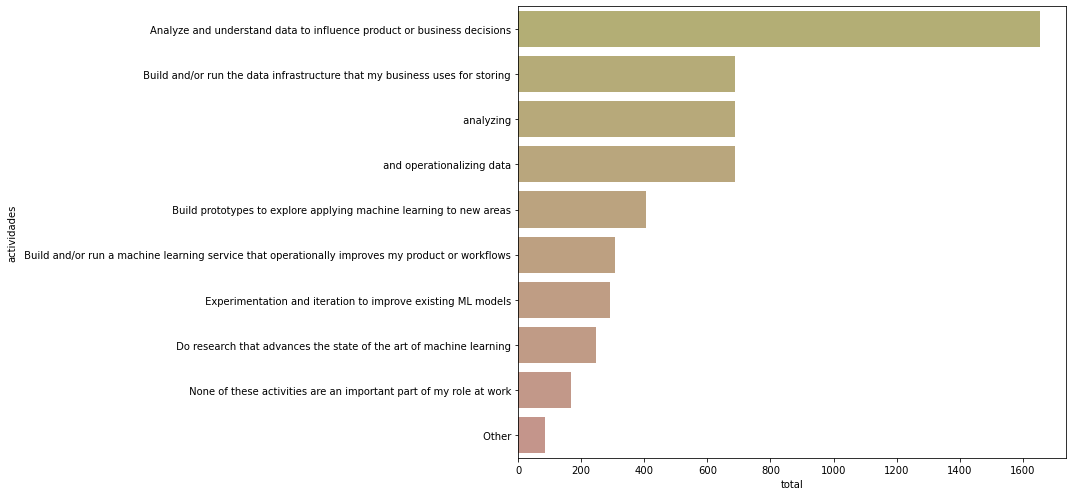

In [ ]:
plt.figure(figsize=(15,7))

sns.barplot(x="total", y = "actividades",data = df_conteo_actividades, palette = colornuevo3)

#plt.legend(labels = df_conteo_actividades["porcentaje"], title = "Porcentaje")
plt.tight_layout()
plt.show()

hemos sacado esta visualizacion, revisar el codigo de color para la presentacion

# LENGUAJES PROGRAMACIÓN

In [ ]:
df_lp = df["lenguajes_programacion"].str.split(",").apply(pd.Series)

In [ ]:
df_conteo_lenguajes = pd.concat([df_lp[0].value_counts(), df_lp[1].value_counts(),df_lp[2].value_counts(),df_lp[3].value_counts(),df_lp[4].value_counts(),df_lp[5].value_counts(),df_lp[6].value_counts(),df_lp[7].value_counts(),df_lp[8].value_counts(),df_lp[9].value_counts(),df_lp[10].value_counts(),df_lp[11].value_counts() ], axis=1)

In [ ]:
df_conteo_lenguajes.fillna(0, inplace=True)

In [ ]:
df_conteo_lenguajes["total"] = df_conteo_lenguajes[0]+ df_conteo_lenguajes[1]+df_conteo_lenguajes[2]+df_conteo_lenguajes[3]+df_conteo_lenguajes[4]+ df_conteo_lenguajes[5]+df_conteo_lenguajes[6]+df_conteo_lenguajes[7]+df_conteo_lenguajes[8]+ df_conteo_lenguajes[9]+df_conteo_lenguajes[10]+df_conteo_lenguajes[11]

In [ ]:
df_conteo_lenguajes.reset_index(inplace=True)

In [ ]:
nueva_columna = {"index": "lenguajes"}
df_conteo_lenguajes.rename(columns = nueva_columna, inplace = True)

In [ ]:
df_conteo_lenguajes

,lenguajes,0,1,2,3,4,5,6,7,8,9,10,11,total
0,Python,1804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1804.0
1,R,132.0,583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,715.0
2,SQL,130.0,833.0,436.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1399.0
3,None,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
4,Other,26.0,54.0,67.0,33.0,23.0,6.0,1.0,1.0,1.0,0.0,0.0,1.0,213.0
5,C,13.0,40.0,76.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171.0
6,C++,7.0,39.0,66.0,64.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0
7,Javascript,5.0,30.0,63.0,66.0,28.0,27.0,10.0,0.0,0.0,0.0,0.0,0.0,229.0
8,MATLAB,4.0,26.0,51.0,46.0,21.0,11.0,10.0,4.0,1.0,0.0,3.0,0.0,177.0
9,Java,4.0,34.0,64.0,56.0,41.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0


In [ ]:
df_conteo_lenguajes["porcentaje"] = round(df_conteo_lenguajes["total"]*100/df_conteo_lenguajes["total"].sum(),2)

In [ ]:
df_conteo_lenguajes.sort_values(by=  ["total"], ascending = False, inplace=True)

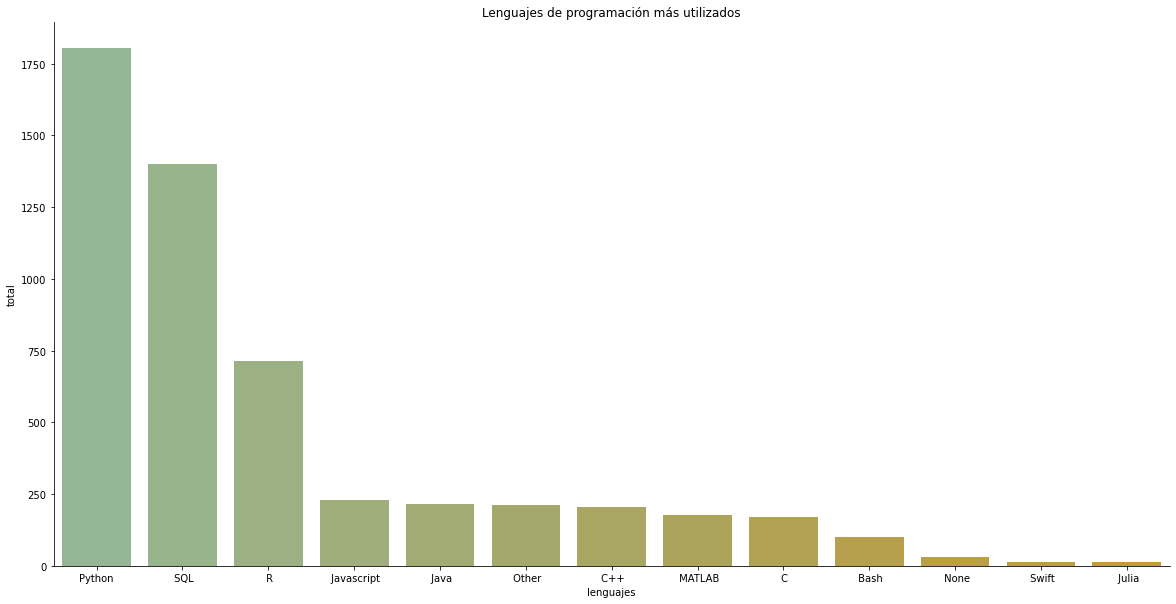

In [ ]:
color1 = sns.blend_palette(("darkseagreen", "goldenrod"), n_colors = 13, as_cmap=False)
# color = sns.color_palette("light:sienna_r")
color5 = sns.color_palette("Set2")

plt.figure(figsize=(20,10))
sns.barplot(x = "lenguajes", y = "total", data = df_conteo_lenguajes, palette = color1)
plt.title("Lenguajes de programación más utilizados")
fig.set(xlabel="Lenguajes", ylabel = "Total")
sns.despine()
plt.show()

# IDE's

In [ ]:
df_ide = df["IDE"].str.split(")").apply(pd.Series)

In [ ]:
df_ide_apply = df_ide.apply(lambda a: a.replace("Jupyter (JupyterLab, Jupyter Notebooks, etc", "Jupyter Notebook"))

In [ ]:
df_ide1 = df_ide_apply[0].str.split(",").apply(pd.Series)

In [ ]:
df_ide2 = df_ide_apply[1].str.split(",").apply(pd.Series)

In [ ]:
df_ide3 = df_ide_apply[2].str.split(",").apply(pd.Series)

In [ ]:
df_conteo_ide = pd.concat([df_ide1, df_ide2, df_ide3], ignore_index = True, axis = 1)

In [ ]:
df_conteo_ide.fillna(0, inplace=True)

In [ ]:
df_conteo_ide = pd.concat([df_conteo_ide[0].value_counts(), df_conteo_ide[1].value_counts(),df_conteo_ide[2].value_counts(),df_conteo_ide[3].value_counts(),df_conteo_ide[4].value_counts(),df_conteo_ide[5].value_counts(),df_conteo_ide[6].value_counts(),df_conteo_ide[7].value_counts(),df_conteo_ide[8].value_counts(),df_conteo_ide[9].value_counts(),df_conteo_ide[10].value_counts(),df_conteo_ide[11].value_counts(), df_conteo_ide[12].value_counts(), df_conteo_ide[13].value_counts(),df_conteo_ide[14].value_counts(),df_conteo_ide[15].value_counts(),df_conteo_ide[16].value_counts(),df_conteo_ide[17].value_counts(),df_conteo_ide[18].value_counts(),df_conteo_ide[19].value_counts(),df_conteo_ide[20].value_counts()], axis=1)

In [ ]:
df_conteo_ide.fillna(0, inplace=True)

In [ ]:
df_conteo_ide["total"] = df_conteo_ide[0]+ df_conteo_ide[1]+df_conteo_ide[2]+df_conteo_ide[3]+df_conteo_ide[4]+ df_conteo_ide[5]+df_conteo_ide[6]+df_conteo_ide[7]+df_conteo_ide[8]+ df_conteo_ide[9]+df_conteo_ide[10]+df_conteo_ide[11]+ df_conteo_ide[12]+ df_conteo_ide[13]+df_conteo_ide[14]+df_conteo_ide[15]+df_conteo_ide[16]+ df_conteo_ide[17]+df_conteo_ide[18]+df_conteo_ide[19]+df_conteo_ide[20]

In [ ]:
df_conteo_ide.drop([0], axis = 0, inplace = True)

In [ ]:
df_conteo_ide.reset_index(inplace=True)

In [ ]:
nueva_columna = {"index": "IDES"}
df_conteo_ide.rename(columns = nueva_columna, inplace = True)

In [ ]:
df_conteo_ide.drop([12], axis = 0, inplace = True)

In [ ]:
df_conteo_ide.sort_values(by= ["total"], ascending = False, inplace=True)

In [ ]:
df_conteo_ide

,IDES,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,total
0,Jupyter Notebook,746.0,276.0,162.0,58.0,17.0,7.0,0.0,186.0,159.0,100.0,33.0,16.0,2.0,0.0,47.0,42.0,19.0,18.0,5.0,0.0,3.0,1896.0
2,Visual Studio Code (VSCode,300.0,128.0,25.0,0.0,0.0,0.0,0.0,105.0,57.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,630.0
1,RStudio,476.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,620.0
3,PyCharm,177.0,93.0,11.0,0.0,0.0,0.0,0.0,164.0,30.0,6.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,538.0
6,Notepad++,74.0,79.0,34.0,8.0,1.0,0.0,0.0,66.0,46.0,17.0,5.0,0.0,0.0,0.0,28.0,15.0,13.0,0.0,0.0,0.0,0.0,386.0
5,Spyder,85.0,72.0,26.0,3.0,0.0,0.0,0.0,54.0,51.0,11.0,2.0,0.0,0.0,0.0,12.0,21.0,0.0,0.0,0.0,0.0,0.0,337.0
4,Visual Studio,163.0,69.0,0.0,0.0,0.0,0.0,0.0,40.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0
9,Sublime Text,30.0,37.0,18.0,8.0,2.0,0.0,0.0,23.0,23.0,19.0,7.0,1.0,0.0,0.0,8.0,13.0,9.0,8.0,0.0,0.0,0.0,206.0
10,MATLAB,13.0,21.0,18.0,7.0,4.0,0.0,0.0,10.0,22.0,7.0,3.0,1.0,0.0,0.0,3.0,3.0,7.0,1.0,0.0,3.0,0.0,123.0
8,Other,33.0,20.0,19.0,6.0,1.0,0.0,0.0,9.0,12.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,109.0


In [ ]:
color13 = sns.diverging_palette(220, 20, as_cmap=False)

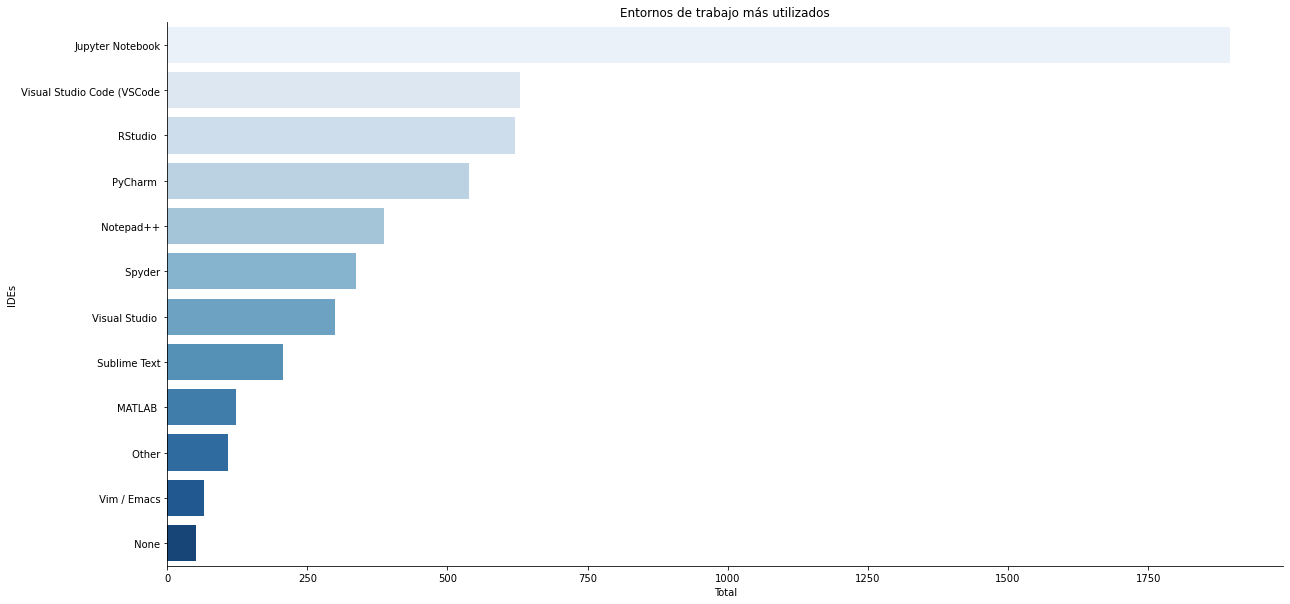

In [ ]:
color5 = sns.color_palette("Blues", n_colors = 12)
plt.figure(figsize=(20,10))
fig = sns.barplot(y=df_conteo_ide["IDES"], x = df_conteo_ide["total"], palette = color5)
plt.title("Entornos de trabajo más utilizados")
fig.set(xlabel="Total", ylabel = "IDEs")
sns.despine()
plt.show()



Es generalizado el uso de más de un lenguaje de programación entre los DA.

De la muestra de la encuesta el lenguaje más usada con mucha diferencia respecto al resto es Python.

El segundo más nombrado es SQL, que también ocupa una posición destacada como tercer lenguaje en los que usan tres o más.

Como segundo lenguaje destaca R.